In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np

In [2]:
DataSet = pd.read_csv('../../../data/processed/Dataset_Particulas_contaminantes.csv',sep=';', decimal=',')
DataSet['fecha'] = pd.to_datetime(DataSet['fecha'])

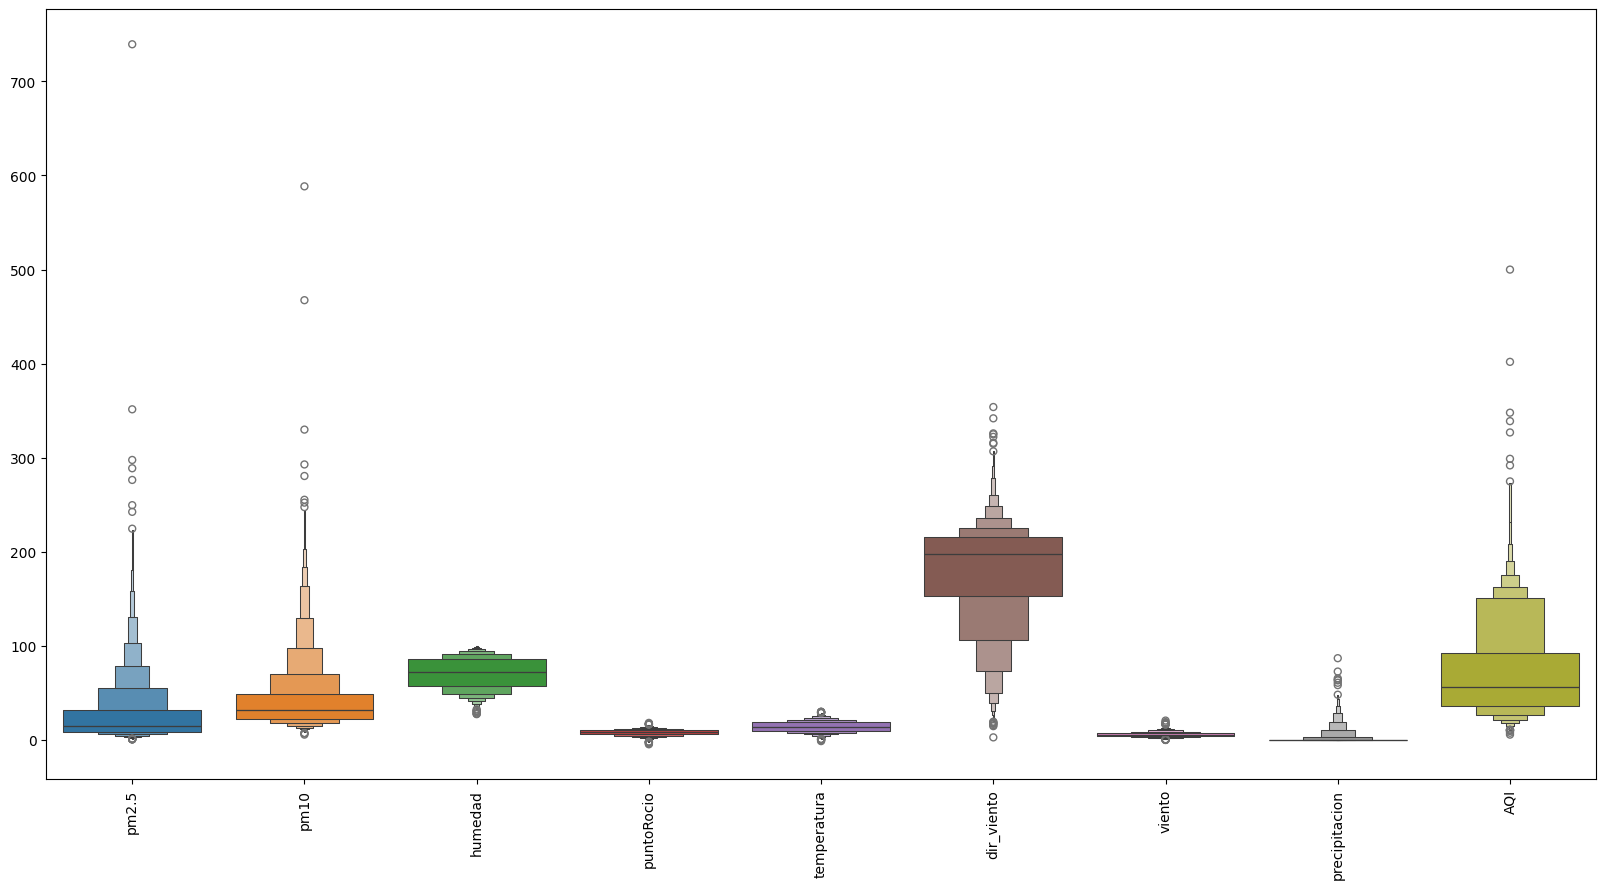

In [3]:
features = DataSet.drop(['fecha'], axis=1)
plt.figure(figsize=(20,10))
sns.boxenplot(data = features)
sns.color_palette("rocket", as_cmap=True)
plt.xticks(rotation=90)
plt.show()

ELIMINACION DE VALORES ATIPICOS

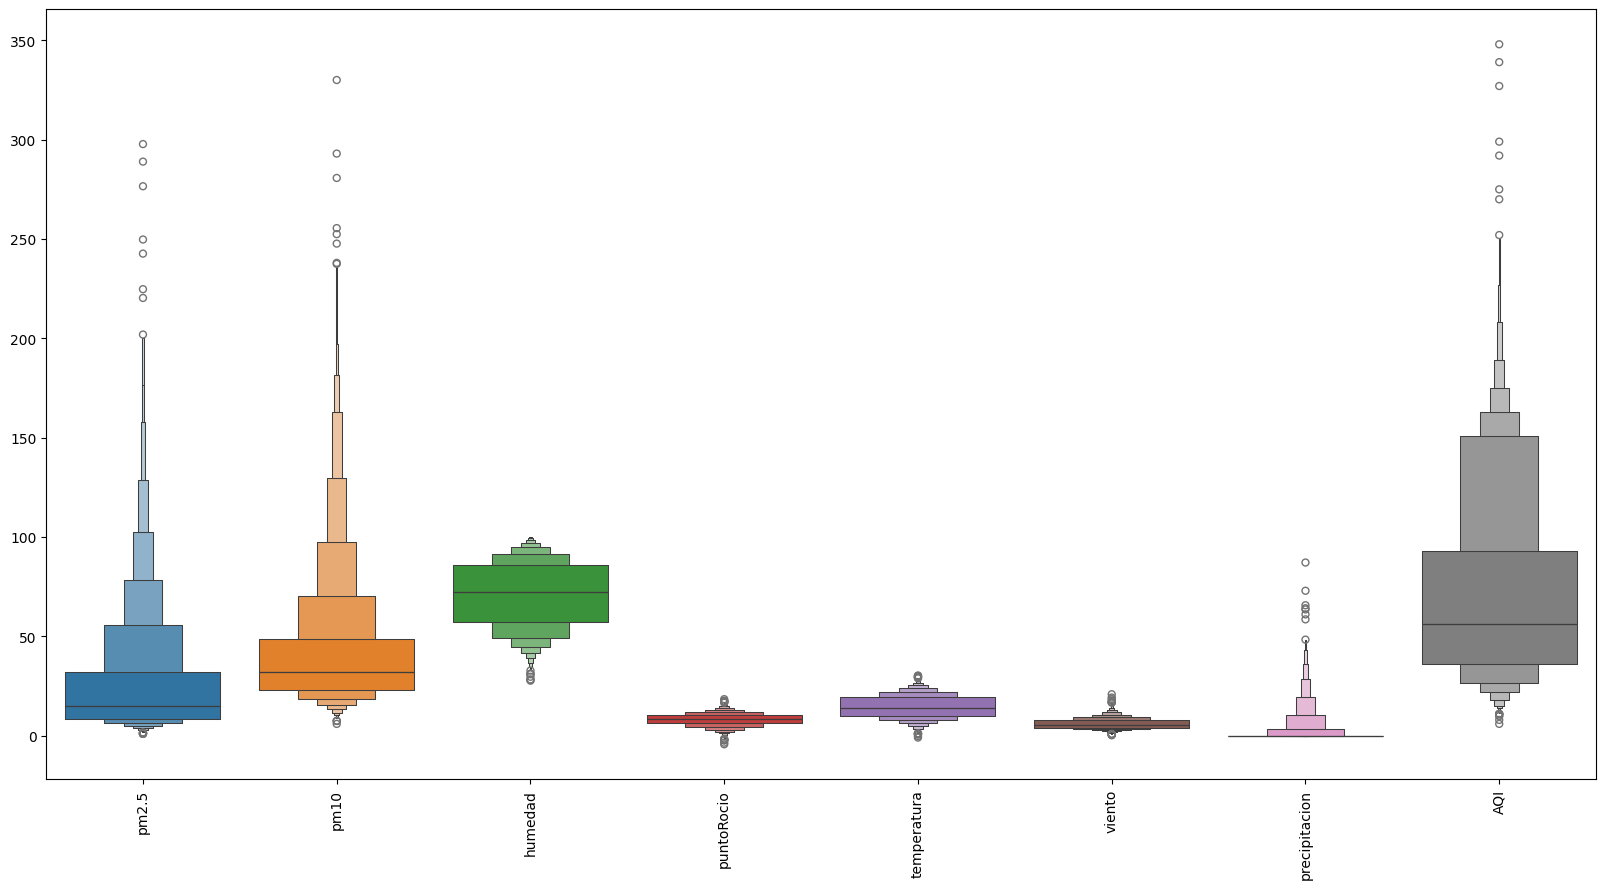

In [4]:
# eliminar valores atipicos antes de normalizar
DataSet = DataSet[DataSet['pm2.5'] < 400]
DataSet = DataSet[DataSet['pm10'] < 400]

# Creando una columna para el año para que se normalice 
DataSet['year'] = DataSet.fecha.dt.year

# eliminamos la direccion del viento como variable, no aporta mayor informacion
DataSet = DataSet.drop('dir_viento',axis=1)

features = DataSet.drop(['fecha','year'], axis=1)
plt.figure(figsize=(20,10))
sns.boxenplot(data = features)
sns.color_palette("rocket", as_cmap=True)
plt.xticks(rotation=90)
plt.show()

CODIFICACION DE FECHA

BUSCAMOS DAR REPRESENTATIVIDAD DE LA FECHA 

-PUEDE DESCOMPONER DE FORMA CICLICA CON FUNCIONES SENO Y COSENO
-DESCOMPONER FECHA SEGUN ESTACIONES , DEL 4 AL 1 , INVIERNO-OTOÑO-PRIMAVERA-VERANO



In [5]:
# Definir la función para determinar la estación del año en el hemisferio sur
def get_season_southern_hemisphere(date):
    year = date.year if date.month > 2 else date.year-1
    seasons = {
        1: (pd.Timestamp(year=year, month=12, day=21), pd.Timestamp(year=year+1, month=3, day=20)),  # Verano
        3: (pd.Timestamp(year=year, month=3, day=21), pd.Timestamp(year=year, month=6, day=20)),    # Otoño
        4: (pd.Timestamp(year=year, month=6, day=21), pd.Timestamp(year=year, month=9, day=22)),    # Invierno
        2: (pd.Timestamp(year=year, month=9, day=23), pd.Timestamp(year=year, month=12, day=20)),   # Primavera
    }



    for season, (start, end) in seasons.items():
        if start <= date <= end:
            return season
    return 1  # Si ninguna condición se cumple, es Verano por defecto



# Aplicar la función para obtener la estación
DataSet['estacion'] = DataSet['fecha'].apply(get_season_southern_hemisphere)

DataSet

,fecha,pm2.5,pm10,humedad,puntoRocio,temperatura,viento,precipitacion,AQI,calidad_aire,year,estacion
0,2013-01-01,9.3612,25.2396,44.8462,10.0615,25.0308,3.7692,0.0,39,Bueno,2013,1
1,2013-01-02,13.7865,36.1072,43.3077,12.1000,25.8000,3.7692,0.0,54,Moderado,2013,1
2,2013-01-03,12.2568,29.2324,62.8462,13.4000,21.2462,2.7692,0.0,51,Moderado,2013,1
3,2013-01-04,12.6945,33.1919,68.6923,13.5385,19.6000,2.7692,0.0,52,Moderado,2013,1
4,2013-01-05,8.6662,26.3441,53.5385,12.3231,23.3231,3.9231,0.0,36,Bueno,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3737,2023-03-27,18.5833,47.5000,53.8750,5.0792,15.8042,3.7083,0.0,64,Moderado,2023,3
3738,2023-03-28,5.8125,23.0000,78.2500,8.4962,12.2885,4.3846,0.1,24,Bueno,2023,3
3739,2023-03-29,5.3542,21.5000,63.3750,5.4625,13.4583,6.9167,0.0,22,Bueno,2023,3
3740,2023-03-30,10.3333,32.0000,55.0417,2.6625,12.6625,8.7083,0.0,43,Bueno,2023,3


In [6]:
# Asegurándonos de que los datos en la columna 'fecha' están en formato datetime
DataSet['fecha'] = pd.to_datetime(DataSet["fecha"])

# Función para codificar datetime en parámetros cíclicos
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

# Creando una columna para el mes y codificándola
DataSet ['mes'] = DataSet.fecha.dt.month
DataSet = encode(DataSet, 'mes', 12)

# Creando una columna para el día y codificándola
DataSet['dia'] = DataSet.fecha.dt.day
DataSet = encode(DataSet, 'dia', 31)

# # Mostrando las primeras filas del dataframe
# data_set_contaminantes.head()

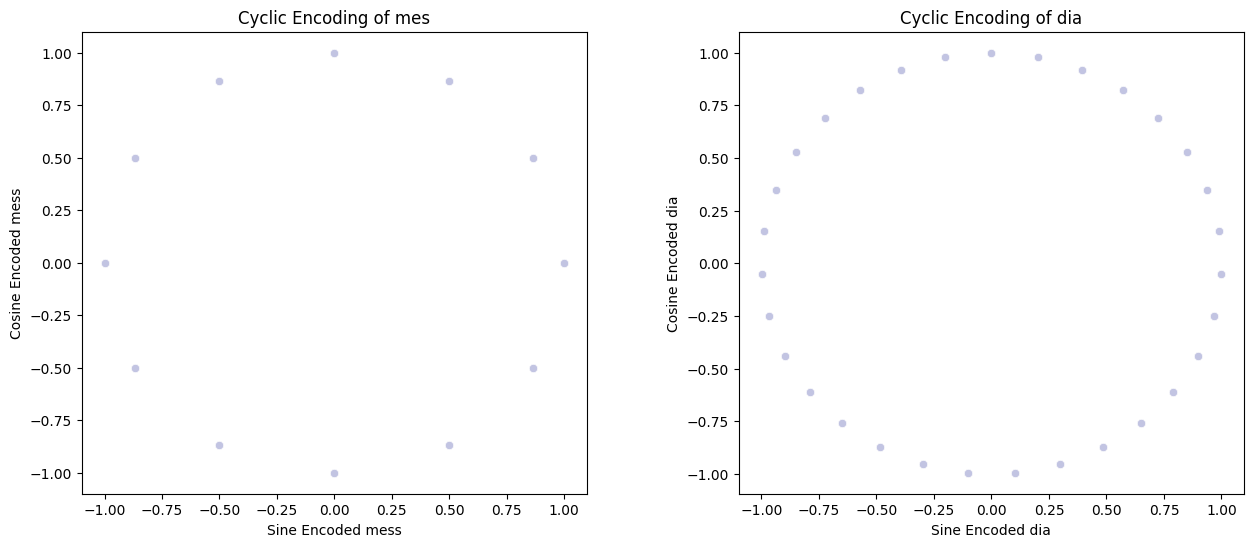

In [7]:
# Crear una figura y un conjunto de subtramas
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 fila, 2 columnas de subtramas

# Gráfico 1: Meses

sns.scatterplot(x="mes_sin", y="mes_cos", data=DataSet, color="#C2C4E2", ax=axes[0])
axes[0].set_title("Cyclic Encoding of mes")
axes[0].set_ylabel("Cosine Encoded mess")
axes[0].set_xlabel("Sine Encoded mess")

# Gráfico 2: Días
sns.scatterplot(x='dia_sin', y='dia_cos', data=DataSet, color="#C2C4E2", ax=axes[1])
axes[1].set_title("Cyclic Encoding of dia")
axes[1].set_ylabel("Cosine Encoded dia")
axes[1].set_xlabel("Sine Encoded dia")

# Ajustar el espacio entre los dos subgráficos
plt.subplots_adjust(wspace=0.3)

plt.show()

In [8]:
DataSet.describe()

,fecha,pm2.5,pm10,humedad,puntoRocio,temperatura,viento,precipitacion,AQI,year,estacion,mes,mes_sin,mes_cos,dia,dia_sin,dia_cos
count,3740,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3.740000e+03,3.740000e+03,3740.000000,3.740000e+03,3740.000000
mean,2018-02-14 02:48:38.502673920,26.493439,42.185554,71.132756,8.365599,14.723675,6.154438,1.936845,72.185561,2017.631283,2.489840,6.417380,1.376303e-02,8.508157e-03,15.723262,1.541039e-03,-0.019097
min,2013-01-01 00:00:00,1.000000,6.000000,27.750000,-4.258300,-0.873100,0.307700,0.000000,6.000000,2013.000000,1.000000,1.000000,-1.000000e+00,-1.000000e+00,1.000000,-9.987165e-01,-0.994869
25%,2015-07-24 18:00:00,8.583525,23.000000,57.166700,6.245450,10.066700,4.153800,0.000000,36.000000,2015.000000,1.000000,3.000000,-5.000000e-01,-5.000000e-01,8.000000,-7.247928e-01,-0.758758
50%,2018-02-14 12:00:00,14.781250,32.000000,72.145850,8.550000,14.167950,5.692300,0.000000,56.500000,2018.000000,3.000000,6.000000,1.224647e-16,6.123234e-17,16.000000,-2.449294e-16,-0.050649
75%,2020-09-06 06:00:00,32.344150,48.892600,86.083300,10.625000,19.327625,7.791700,0.000000,93.000000,2020.000000,4.000000,9.000000,8.660254e-01,8.660254e-01,23.000000,7.247928e-01,0.688967
max,2023-03-31 00:00:00,297.780700,330.017000,100.000000,18.450000,30.330800,20.913000,87.200000,348.000000,2023.000000,4.000000,12.000000,1.000000e+00,1.000000e+00,31.000000,9.987165e-01,1.000000
std,NaN,29.940360,32.694198,16.934186,3.220350,5.870399,2.678187,6.448133,48.481447,2.959499,1.129797,3.478489,7.085316e-01,7.056831e-01,8.796784,7.135256e-01,0.700558


In [9]:
data_MinMaxScaler = DataSet.copy()
# columnas numericas
cols = data_MinMaxScaler.select_dtypes(include=[float, int]).columns.tolist()

# Crea el escalador
scaler_minmax = MinMaxScaler()

# Ajusta el escalador solo en las columnas numéricas y transforma
data_MinMaxScaler[cols] = scaler_minmax.fit_transform(data_MinMaxScaler[cols])

In [10]:
import pickle

# Asumiendo que 'scaler_minmax' es tu objeto MinMaxScaler ya entrenado
with open('../scaler_minmax.pkl', 'wb') as file:
    pickle.dump(scaler_minmax, file)

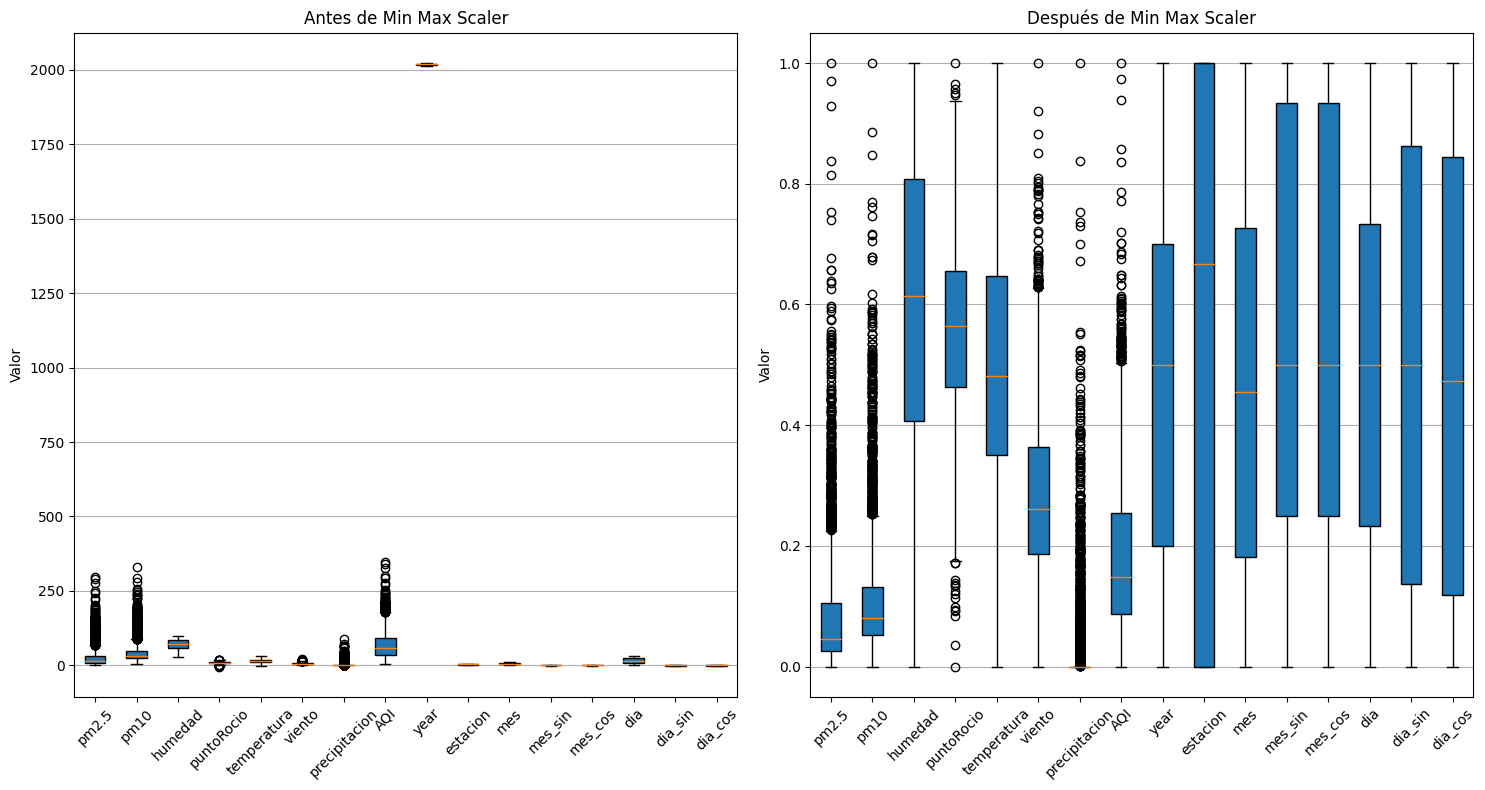

In [11]:
cols_numericas = data_MinMaxScaler.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(15, 8))

# Subplot 1: Antes de Min Max Scaler
plt.subplot(1, 2, 1)
plt.boxplot([DataSet[col] for col in cols_numericas], vert=True, patch_artist=True) # añade vert=True para gráficos verticales, patch_artist=True para relleno
plt.title('Antes de Min Max Scaler')
plt.xticks(range(1, len(cols_numericas) + 1), cols_numericas, rotation=45) # Para rotar los nombres para mejor lectura
plt.ylabel('Valor')  # Etiqueta para el eje y
plt.grid(axis='y')

# Subplot 2: Después de Min Max Scaler
plt.subplot(1, 2, 2)
plt.boxplot([data_MinMaxScaler[col] for col in cols_numericas], vert=True, patch_artist=True)
plt.title('Después de Min Max Scaler')
plt.xticks(range(1, len(cols_numericas) + 1), cols_numericas, rotation=45) 
plt.ylabel('Valor')
plt.grid(axis='y')

plt.tight_layout()

# Guardar la imagen
ruta_guardado = '../../explore/imagenes/normalizacion_MinMax_all_rnn.png'  # Reemplaza con tu ruta
plt.savefig(ruta_guardado, format='png', dpi=300)

plt.show()

In [12]:
path = '../../../data/processed/normalizados/Dataset_MinMax.csv'
data_MinMaxScaler.to_csv(path, sep=';',index=False, float_format='%.4f', decimal=',')